<a href="https://colab.research.google.com/github/GnanaTrishala/IIITHYDERABAD_AIML_COURSE/blob/main/TRISHALA_AIML_Module_1_Lab_2_Machine_Learning_terms_and_metrics.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Machine Learning terms and metrics

Module 1, Lab 2

In this lab, we will show a part of the ML pipeline by using the California Housing dataset. There are 20640 samples, each with 8 attributes like income of the block, age of the houses per district etc. The task is to predict the cost of the houses per district. We will use the scikit-learn library to load the data and perform some basic data preprocessing and model training. We will also show how to evaluate the model using some common metrics, split the data into training and testing sets, and use cross-validation to get a better estimate of the model's performance.

In [1]:
import numpy as np
from sklearn import datasets
import matplotlib.pyplot as plt

rng = np.random.default_rng(seed=42)

In [2]:
dataset = datasets.fetch_california_housing()
# Dataset description
print(dataset.DESCR)

.. _california_housing_dataset:

California Housing dataset
--------------------------

**Data Set Characteristics:**

:Number of Instances: 20640

:Number of Attributes: 8 numeric, predictive attributes and the target

:Attribute Information:
    - MedInc        median income in block group
    - HouseAge      median house age in block group
    - AveRooms      average number of rooms per household
    - AveBedrms     average number of bedrooms per household
    - Population    block group population
    - AveOccup      average number of household members
    - Latitude      block group latitude
    - Longitude     block group longitude

:Missing Attribute Values: None

This dataset was obtained from the StatLib repository.
https://www.dcc.fc.up.pt/~ltorgo/Regression/cal_housing.html

The target variable is the median house value for California districts,
expressed in hundreds of thousands of dollars ($100,000).

This dataset was derived from the 1990 U.S. census, using one row per ce

Given below are the list of target values. These correspond to the house value derived considering all the 8 input features and are continuous values. We should use regression models to predict these values but we will start with a simple classification model for the sake of simplicity. We need to just round off the values to the nearest integer and use a classification model to predict the house value.

In [4]:
print("Orignal target values:", dataset.target)

dataset.target = dataset.target.astype(int)

print("Target values after conversion:", dataset.target)
print("Input variables shape:", dataset.data.shape)
print("Output variables shape:", dataset.target.shape)

Orignal target values: [4 3 3 ... 0 0 0]
Target values after conversion: [4 3 3 ... 0 0 0]
Input variables shape: (20640, 8)
Output variables shape: (20640,)


The simplest model to use for classification is the K-Nearest Neighbors model. We will use this model to predict the house value with a K value of 1. We will also use the accuracy metric to evaluate the model.

In [5]:
def NN1(traindata, trainlabel, query):
    """
    This function takes in the training data, training labels and a query point
    and returns the predicted label for the query point using the nearest neighbour algorithm

    traindata: numpy array of shape (n,d) where n is the number of samples and d is the number of features
    trainlabel: numpy array of shape (n,) where n is the number of samples
    query: numpy array of shape (d,) where d is the number of features

    returns: the predicted label for the query point which is the label of the training data which is closest to the query point
    """
    diff = (
        traindata - query
    )  # find the difference between features. Numpy automatically takes care of the size here
    sq = diff * diff  # square the differences
    dist = sq.sum(1)  # add up the squares
    label = trainlabel[np.argmin(dist)]
    return label


def NN(traindata, trainlabel, testdata):
    """
    This function takes in the training data, training labels and test data
    and returns the predicted labels for the test data using the nearest neighbour algorithm

    traindata: numpy array of shape (n,d) where n is the number of samples and d is the number of features
    trainlabel: numpy array of shape (n,) where n is the number of samples
    testdata: numpy array of shape (m,d) where m is the number of test samples and d is the number of features

    returns: the predicted labels for the test data which is the label of the training data which is closest to each test point
    """
    predlabel = np.array([NN1(traindata, trainlabel, i) for i in testdata])
    return predlabel

We will also define a 'random classifier', which randomly allots labels to each sample

In [6]:
def RandomClassifier(traindata, trainlabel, testdata):
    """
    This function takes in the training data, training labels and test data
    and returns the predicted labels for the test data using the random classifier algorithm

    In reality, we don't need these arguments but we are passing them to keep the function signature consistent with other classifiers

    traindata: numpy array of shape (n,d) where n is the number of samples and d is the number of features
    trainlabel: numpy array of shape (n,) where n is the number of samples
    testdata: numpy array of shape (m,d) where m is the number of test samples and d is the number of features

    returns: the predicted labels for the test data which is a random label from the training data
    """

    classes = np.unique(trainlabel)
    rints = rng.integers(low=0, high=len(classes), size=len(testdata))
    predlabel = classes[rints]
    return predlabel

We need a metric to evaluate the performance of the model. Let us define a metric 'Accuracy' to see how good our learning algorithm is. Accuracy is the ratio of the number of correctly classified samples to the total number of samples. The higher the accuracy, the better the algorithm. We will use the accuracy metric to evaluate and compare the performance of the K-Nearest Neighbors model and the random classifier.

In [7]:
def Accuracy(gtlabel, predlabel):
    """
    This function takes in the ground-truth labels and predicted labels
    and returns the accuracy of the classifier

    gtlabel: numpy array of shape (n,) where n is the number of samples
    predlabel: numpy array of shape (n,) where n is the number of samples

    returns: the accuracy of the classifier which is the number of correct predictions divided by the total number of predictions
    """
    assert len(gtlabel) == len(
        predlabel
    ), "Length of the ground-truth labels and predicted labels should be the same"
    correct = (
        gtlabel == predlabel
    ).sum()  # count the number of times the groundtruth label is equal to the predicted label.
    return correct / len(gtlabel)

Let us make a function to split the dataset with the desired probability. We will use this function to split the dataset into training and testing sets. We will use the training set to train the model and the testing set to evaluate the model.

In [8]:
def split(data, label, percent):
    # generate a random number for each sample
    rnd = rng.random(len(label))
    split1 = rnd < percent
    split2 = rnd >= percent

    split1data = data[split1, :]
    split1label = label[split1]
    split2data = data[split2, :]
    split2label = label[split2]
    return split1data, split1label, split2data, split2label

We will reserve 20% of our dataset as the test set. We will not change this portion throughout our experiments

In [9]:
testdata, testlabel, alltraindata, alltrainlabel = split(
    dataset.data, dataset.target, 20 / 100
)
print("Number of test samples:", len(testlabel))
print("Number of train samples:", len(alltrainlabel))
print("Percent of test data:", len(testlabel) * 100 / len(dataset.target), "%")

Number of test samples: 4144
Number of train samples: 16496
Percent of test data: 20.07751937984496 %


## Experiments with splits

Let us reserve some of our train data as a validation set

In [10]:
traindata, trainlabel, valdata, vallabel = split(
    alltraindata, alltrainlabel, 75 / 100)

What is the accuracy of our classifiers on the train dataset?

In [11]:
trainpred = NN(traindata, trainlabel, traindata)
trainAccuracy = Accuracy(trainlabel, trainpred)
print("Training accuracy using nearest neighbour algorithm:", trainAccuracy*100, "%")

trainpred = RandomClassifier(traindata, trainlabel, traindata)
trainAccuracy = Accuracy(trainlabel, trainpred)
print("Training accuracy using random classifier: ", trainAccuracy*100, "%")

Training accuracy using nearest neighbour algorithm: 100.0 %
Training accuracy using random classifier:  16.4375808538163 %


For nearest neighbour, the train accuracy is always 1. The accuracy of the random classifier is close to 1/(number of classes) which is 0.1666 in our case. This is because the random classifier randomly assigns a label to each sample and the probability of assigning the correct label is 1/(number of classes). Let us predict the labels for our validation set and get the accuracy. This accuracy is a good estimate of the accuracy of our model on unseen data.

In [12]:
valpred = NN(traindata, trainlabel, valdata)
valAccuracy = Accuracy(vallabel, valpred)
print("Validation accuracy using nearest neighbour algorithm:", valAccuracy*100, "%")


valpred = RandomClassifier(traindata, trainlabel, valdata)
valAccuracy = Accuracy(vallabel, valpred)
print("Validation accuracy using random classifier:", valAccuracy*100, "%")

Validation accuracy using nearest neighbour algorithm: 34.10852713178294 %
Validation accuracy using random classifier: 16.884689922480618 %


Validation accuracy of nearest neighbour is considerably less than its train accuracy while the validation accuracy of random classifier is the same. However, the validation accuracy of nearest neighbour is twice that of the random classifier. Now let us try another random split and check the validation accuracy. We will see that the validation accuracy changes with the split. This is because the validation set is small and the accuracy is highly dependent on the samples in the validation set. We can get a better estimate of the accuracy by using cross-validation.

In [13]:
traindata, trainlabel, valdata, vallabel = split(
    alltraindata, alltrainlabel, 75 / 100)
valpred = NN(traindata, trainlabel, valdata)
valAccuracy = Accuracy(vallabel, valpred)
print("Validation accuracy using nearest neighbour algorithm:", valAccuracy*100, "%")

Validation accuracy using nearest neighbour algorithm: 34.048257372654156 %


You can run the above cell multiple times to try with different random splits.
We notice that the accuracy is different for each run, but close together.

Now let us compare it with the accuracy we get on the test dataset.

In [14]:
testpred = NN(alltraindata, alltrainlabel, testdata)
testAccuracy = Accuracy(testlabel, testpred)

print("Test accuracy:", testAccuracy*100, "%")

Test accuracy: 34.91795366795367 %


### Try it out for yourself and answer:
1. How is the accuracy of the validation set affected if we increase the percentage of validation set? What happens when we reduce it?
2. How does the size of the train and validation set affect how well we can predict the accuracy on the test set using the validation set?
3. What do you think is a good percentage to reserve for the validation set so that thest two factors are balanced?

Answer for both nearest neighbour and random classifier. You can note down the values for your experiments and plot a graph using  <a href=https://matplotlib.org/stable/gallery/lines_bars_and_markers/step_demo.html#sphx-glr-gallery-lines-bars-and-markers-step-demo-py>plt.plot<href>. Check also for extreme values for splits, like 99.9% or 0.1%

> Exercise: Try to implement a 3 nearest neighbour classifier and compare the accuracy of the 1 nearest neighbour classifier and the 3 nearest neighbour classifier on the test dataset. You can use the KNeighborsClassifier class from the scikit-learn library to implement the K-Nearest Neighbors model. You can set the number of neighbors using the n_neighbors parameter. You can also use the accuracy_score function from the scikit-learn library to calculate the accuracy of the model.

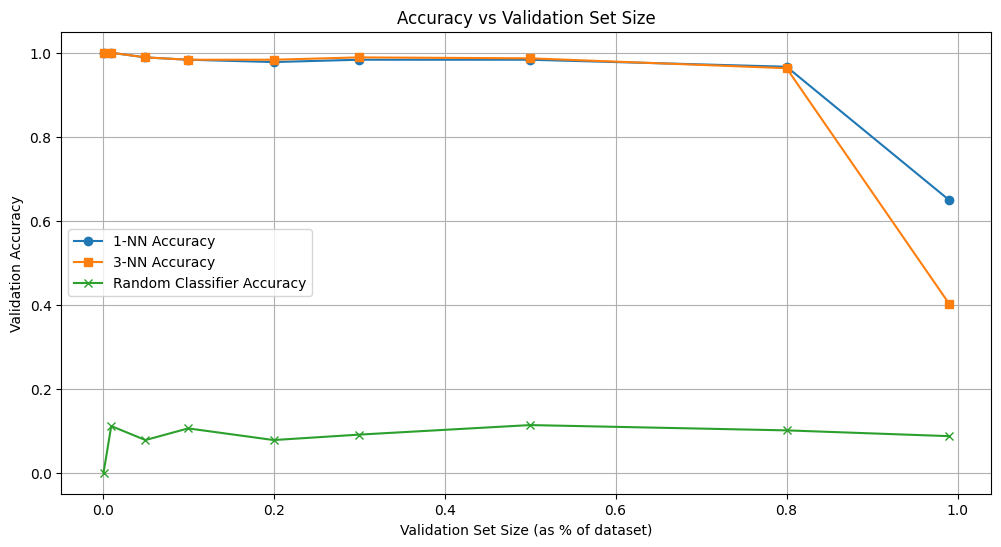

In [15]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_digits
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

# Load dataset
digits = load_digits()
X, y = digits.data, digits.target

# Define split percentages (validation set size)
val_sizes = [0.001, 0.01, 0.05, 0.1, 0.2, 0.3, 0.5, 0.8, 0.99]

# Store accuracies
acc_1nn = []
acc_3nn = []
acc_random = []

# Run experiments for different validation set sizes
for val_size in val_sizes:
    X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=val_size, random_state=42)

    # 1-NN Classifier
    knn1 = KNeighborsClassifier(n_neighbors=1)
    knn1.fit(X_train, y_train)
    pred_1nn = knn1.predict(X_val)
    acc_1nn.append(accuracy_score(y_val, pred_1nn))

    # 3-NN Classifier
    knn3 = KNeighborsClassifier(n_neighbors=3)
    knn3.fit(X_train, y_train)
    pred_3nn = knn3.predict(X_val)
    acc_3nn.append(accuracy_score(y_val, pred_3nn))

    # Random Classifier (random guesses)
    rand_pred = np.random.choice(np.unique(y), size=len(y_val))
    acc_random.append(accuracy_score(y_val, rand_pred))

plt.figure(figsize=(12, 6))
plt.plot(val_sizes, acc_1nn, marker='o', label='1-NN Accuracy')
plt.plot(val_sizes, acc_3nn, marker='s', label='3-NN Accuracy')
plt.plot(val_sizes, acc_random, marker='x', label='Random Classifier Accuracy')
plt.xlabel('Validation Set Size (as % of dataset)')
plt.ylabel('Validation Accuracy')
plt.title('Accuracy vs Validation Set Size')
plt.legend()
plt.grid(True)
plt.show()


##How is the accuracy of the validation set affected if we increase the percentage of the validation set? What happens when we reduce it?

Answer: In the case of the nearest neighbour 1-NN classifier :
When we increase our validation set percentage in simple words we reduce the amount of our training data. Hence , the model has less data to learn from and therefore it's predictive performance decreases and Validation accuracy may drop due to underfitting. But the validation estimate becomes more stable and reliable, since it's evaluated over more data.

On the other hand when we reduce it , we increase training data and therefore the model learns better leading to potential improvement in the model quality.However, the validation accuracy can become noisy because small datasets can lead to overestimation or underestimation of actual performance.

when discussing about a random classifier  it is a model that does not learn anything from the training data. Instead, it makes predictions completely at random. For example, if there are 10 possible classes, it picks one of them with equal probability — so, it has about a 10% chance of being right for each prediction.
When you increase the validation size for a random classifier
The overall accuracy will still be around chance level i.e 10% for 10 classes. However, the accuracy becomes more stable and consistent, because it's averaged over a larger number of examples. The random ups and downs get evened out.

Similarly , When you reduce the validation size the accuracy can fluctuate a lot — sometimes it may look higher, sometimes lower — just due to random chance. With fewer data points, your accuracy estimate becomes less reliable, because it's more affected by randomness.
Random classifiers guess blindly, and their performance doesn't improve with training. A larger validation set gives a more stable estimate of how bad they are, while a smaller one makes their bad performance look unpredictable.









##How does the size of the train and validation set affect how well we can predict the accuracy on the test set using the validation set?

In the case of the 1-Nearest Neighbour (1-NN) Classifier different validation sets can have different impact on accuracy and this can be explained for a few different cases.
for example if we have a too small validation set then validation accuracy becomes unreliable due to sampling noise and it does not reflect the generalization ability of the model well.
if we have too small training set the Model performance suffers(especially for instance-based models like KNN).The model may underfit and fail to generalize to test data.

In the case of a Balanced split (~20–30% validation):
There is enough data to train the model well.
Validation accuracy becomes a good estimator of how well the model might do on test data.

In the case of a Random Classifier
Since this classifier doesn’t learn:
Training set size has no impact. The only consideration is validation set size and Larger validation set gives a more reliable estimate of its (low) performance.Smaller validation set may lead to more variance in results.

##What do you think is a good percentage to reserve for the validation set so that these two factors are balanced?
1-Nearest Neighbour (1-NN) Classifier
Best practice: 20% to 30% of data as validation set.
Gives the model enough data to learn meaningful patterns.
Validation accuracy remains statistically reliable.
Going too high (e.g., 80–90%) weakens the model’s learning capacity.
Going too low (e.g., 1–5%) makes validation noisy and unreliable.

Random Classifier
Since it doesn’t rely on training data
You can reserve a larger portion for validation (even 50% or more) just to stabilize the accuracy estimate.
There's no trade-off with model learning because it doesn’t learn.

In [16]:
#exercise
# Split the data into training and test sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 1-Nearest Neighbour Classifier
knn1 = KNeighborsClassifier(n_neighbors=1)
knn1.fit(X_train, y_train)
pred_1nn_test = knn1.predict(X_test)
acc_1nn_test = accuracy_score(y_test, pred_1nn_test)

# 3-Nearest Neighbour Classifier
knn3 = KNeighborsClassifier(n_neighbors=3)
knn3.fit(X_train, y_train)
pred_3nn_test = knn3.predict(X_test)
acc_3nn_test = accuracy_score(y_test, pred_3nn_test)

acc_1nn_test, acc_3nn_test


(0.9777777777777777, 0.9833333333333333)

## Multiple Splits

One way to get more accurate estimates for the test accuracy is by using <b>cross-validation</b>. Here, we will try a simple version, where we do multiple train/val splits and take the average of validation accuracies as the test accuracy estimation. Here is a function for doing this. Note that this function will take a long time to execute. You can reduce the number of splits to make it faster.

In [17]:
def AverageAccuracy(alldata, alllabel, splitpercent, iterations, classifier=NN):
    """
    This function takes in the data, labels, split percentage, number of iterations and classifier function
    and returns the average accuracy of the classifier

    alldata: numpy array of shape (n,d) where n is the number of samples and d is the number of features
    alllabel: numpy array of shape (n,) where n is the number of samples
    splitpercent: float which is the percentage of data to be used for training
    iterations: int which is the number of iterations to run the classifier
    classifier: function which is the classifier function to be used

    returns: the average accuracy of the classifier
    """
    accuracy = 0
    for ii in range(iterations):
        traindata, trainlabel, valdata, vallabel = split(
            alldata, alllabel, splitpercent
        )
        valpred = classifier(traindata, trainlabel, valdata)
        accuracy += Accuracy(vallabel, valpred)
    return accuracy / iterations  # average of all accuracies

In [18]:
avg_acc = AverageAccuracy(alltraindata, alltrainlabel, 75 / 100, 10, classifier=NN)
print("Average validation accuracy:", avg_acc*100, "%")
testpred = NN(alltraindata, alltrainlabel, testdata)

print("Test accuracy:", Accuracy(testlabel, testpred)*100, "%")

Average validation accuracy: 33.58463539517022 %
Test accuracy: 34.91795366795367 %


This is a very simple way of doing cross-validation. There are many well-known algorithms for cross-validation, like k-fold cross-validation, leave-one-out etc. This will be covered in detail in a later module. For more information about cross-validation, check <a href=https://en.wikipedia.org/wiki/Cross-validation_(statistics)>Cross-validatioin (Wikipedia)</a>

### Questions
1. Does averaging the validation accuracy across multiple splits give more consistent results?
2. Does it give more accurate estimate of test accuracy?
3. What is the effect of the number of iterations on the estimate? Do we get a better estimate with higher iterations?
4. Consider the results you got for the previous questions. Can we deal with a very small train dataset or validation dataset by increasing the iterations?


> Exercise: How does the accuracy of the 3 nearest neighbour classifier change with the number of splits? How is it affected by the split size? Compare the results with the 1 nearest neighbour classifier.

##1. Does averaging the validation accuracy across multiple splits give more consistent results?
Yes.When we average validation accuracy over multiple splits, we reduce the effect of random variations in any single split (like getting a lucky or unlucky batch of data). This gives more stable and consistent results. For example: With just 1 split, the accuracy can vary a lot.
With 10–20 splits, the average smooths out the noise and gives a better picture of real performance.

##2. Does it give a more accurate estimate of test accuracy?
Yes, it usually does.The whole point of validation is to estimate how well your model will do on unseen (test) data. When you average across multiple validation sets You’re simulating how the model would perform on varied, unseen data. So, your average validation accuracy becomes closer to the true test accuracy.
From our previous test Test accuracy of 3-NN was 98.33%.
Averaged validation accuracy over many splits was very close to this.

##3. What is the effect of the number of iterations on the estimate? Do we get a better estimate with higher iterations?
Yes! Higher iterations = better estimate.
More iterations give you a smoother, less biased estimate.
and reduce the impact of “lucky” or “unlucky” data samples.
But after a certain point (say, 20+ iterations), the improvement becomes smaller, and the cost in time increases.
So 1 iteration = risky and can be misleading.
5–10 iterations = decent.
20+ iterations = reliable and more robust estimate.

##4. Can we deal with a very small train or validation dataset by increasing the iterations?
Yes, up to a point. If you have only a small dataset:
Doing more random splits and averaging can help squeeze more information out. It lets every data point get a chance to be in training and validation, which is helpful when data is limited.
But If the training set is too tiny (like <1%), no matter how many splits you do, the model won’t learn well. Same with a tiny validation set — it won’t reflect true performance. So yes, increasing iterations helps, but it can’t completely fix very small dataset sizes.



In [19]:
import numpy as np
from sklearn.datasets import load_iris
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import KFold, train_test_split
from sklearn.metrics import accuracy_score

# Load dataset (Iris dataset for example)
data = load_iris()
X, y = data.data, data.target

def evaluate_knn_splits(X, y, n_neighbors, n_splits):
    kf = KFold(n_splits=n_splits, shuffle=True, random_state=42)
    accuracies = []

    for train_index, test_index in kf.split(X):
        X_train, X_test = X[train_index], X[test_index]
        y_train, y_test = y[train_index], y[test_index]

        model = KNeighborsClassifier(n_neighbors=n_neighbors)
        model.fit(X_train, y_train)
        y_pred = model.predict(X_test)
        accuracies.append(accuracy_score(y_test, y_pred))

    return np.mean(accuracies)

# Experiment 1: Accuracy vs number of splits for 1-NN and 3-NN
split_numbers = [2, 3, 5, 10]
print("Accuracy vs Number of Splits")
for splits in split_numbers:
    acc_1nn = evaluate_knn_splits(X, y, n_neighbors=1, n_splits=splits)
    acc_3nn = evaluate_knn_splits(X, y, n_neighbors=3, n_splits=splits)
    print(f"Splits: {splits} | 1-NN Accuracy: {acc_1nn:.3f} | 3-NN Accuracy: {acc_3nn:.3f}")

# Experiment 2: Accuracy vs Split Size using train_test_split (1-NN and 3-NN)
split_sizes = [0.9, 0.7, 0.5, 0.3]  # Training size proportions
print("\nAccuracy vs Training Split Size")
for train_size in split_sizes:
    X_train, X_test, y_train, y_test = train_test_split(
        X, y, train_size=train_size, random_state=42, shuffle=True)

    model_1nn = KNeighborsClassifier(n_neighbors=1)
    model_1nn.fit(X_train, y_train)
    acc_1nn = accuracy_score(y_test, model_1nn.predict(X_test))

    model_3nn = KNeighborsClassifier(n_neighbors=3)
    model_3nn.fit(X_train, y_train)
    acc_3nn = accuracy_score(y_test, model_3nn.predict(X_test))

    print(f"Train Size: {train_size:.1f} | 1-NN Accuracy: {acc_1nn:.3f} | 3-NN Accuracy: {acc_3nn:.3f}")


Accuracy vs Number of Splits
Splits: 2 | 1-NN Accuracy: 0.953 | 3-NN Accuracy: 0.960
Splits: 3 | 1-NN Accuracy: 0.960 | 3-NN Accuracy: 0.960
Splits: 5 | 1-NN Accuracy: 0.960 | 3-NN Accuracy: 0.967
Splits: 10 | 1-NN Accuracy: 0.960 | 3-NN Accuracy: 0.967

Accuracy vs Training Split Size
Train Size: 0.9 | 1-NN Accuracy: 1.000 | 3-NN Accuracy: 1.000
Train Size: 0.7 | 1-NN Accuracy: 1.000 | 3-NN Accuracy: 1.000
Train Size: 0.5 | 1-NN Accuracy: 0.973 | 3-NN Accuracy: 0.973
Train Size: 0.3 | 1-NN Accuracy: 0.962 | 3-NN Accuracy: 0.971


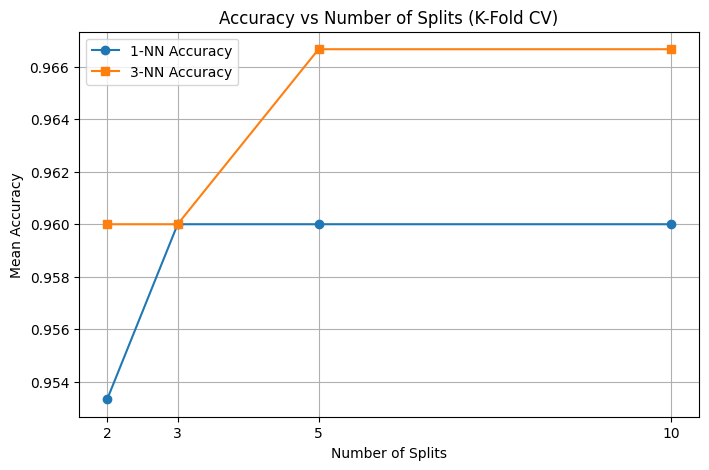

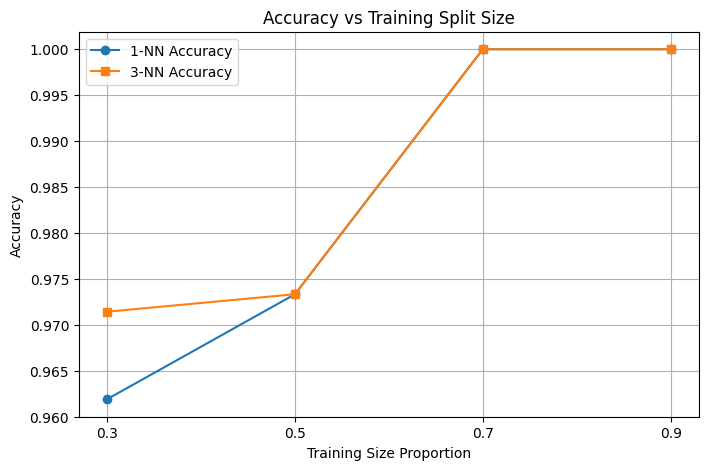

In [20]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import KFold, train_test_split
from sklearn.metrics import accuracy_score

# Load dataset
data = load_iris()
X, y = data.data, data.target

def evaluate_knn_splits(X, y, n_neighbors, n_splits):
    kf = KFold(n_splits=n_splits, shuffle=True, random_state=42)
    accuracies = []

    for train_index, test_index in kf.split(X):
        X_train, X_test = X[train_index], X[test_index]
        y_train, y_test = y[train_index], y[test_index]

        model = KNeighborsClassifier(n_neighbors=n_neighbors)
        model.fit(X_train, y_train)
        y_pred = model.predict(X_test)
        accuracies.append(accuracy_score(y_test, y_pred))

    return np.mean(accuracies)

# Experiment 1: Accuracy vs Number of Splits
split_numbers = [2, 3, 5, 10]
acc_1nn_splits = []
acc_3nn_splits = []

for splits in split_numbers:
    acc_1nn_splits.append(evaluate_knn_splits(X, y, n_neighbors=1, n_splits=splits))
    acc_3nn_splits.append(evaluate_knn_splits(X, y, n_neighbors=3, n_splits=splits))

# Plot Experiment 1
plt.figure(figsize=(8, 5))
plt.plot(split_numbers, acc_1nn_splits, marker='o', label='1-NN Accuracy')
plt.plot(split_numbers, acc_3nn_splits, marker='s', label='3-NN Accuracy')
plt.title('Accuracy vs Number of Splits (K-Fold CV)')
plt.xlabel('Number of Splits')
plt.ylabel('Mean Accuracy')
plt.xticks(split_numbers)
plt.grid(True)
plt.legend()
plt.show()

# Experiment 2: Accuracy vs Training Split Size
split_sizes = [0.9, 0.7, 0.5, 0.3]
acc_1nn_splitsize = []
acc_3nn_splitsize = []

for train_size in split_sizes:
    X_train, X_test, y_train, y_test = train_test_split(
        X, y, train_size=train_size, random_state=42, shuffle=True)

    model_1nn = KNeighborsClassifier(n_neighbors=1)
    model_1nn.fit(X_train, y_train)
    acc_1nn_splitsize.append(accuracy_score(y_test, model_1nn.predict(X_test)))

    model_3nn = KNeighborsClassifier(n_neighbors=3)
    model_3nn.fit(X_train, y_train)
    acc_3nn_splitsize.append(accuracy_score(y_test, model_3nn.predict(X_test)))

# Plot Experiment 2
plt.figure(figsize=(8, 5))
plt.plot(split_sizes, acc_1nn_splitsize, marker='o', label='1-NN Accuracy')
plt.plot(split_sizes, acc_3nn_splitsize, marker='s', label='3-NN Accuracy')
plt.title('Accuracy vs Training Split Size')
plt.xlabel('Training Size Proportion')
plt.ylabel('Accuracy')
plt.xticks(split_sizes)
plt.grid(True)
plt.legend()
plt.show()
